In [1]:
#pip install yellowbrick

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [4]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [5]:
df.tail()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804
18884,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Enplaned,Other,International,A,1243


In [6]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
16576,201703,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Enplaned,Other,Terminal 3,F,5370
6994,201007,AirTran Airways,FL,AirTran Airways,FL,Domestic,US,Enplaned,Low Fare,Terminal 1,B,23811
18364,201803,United Airlines,UA,United Airlines,UA,Domestic,US,Thru / Transit,Other,Terminal 3,E,43
17986,201801,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 2,D,111274
1038,200604,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Enplaned,Other,International,G,4327


In [7]:
df.describe()

,Activity Period,Passenger Count
count,18885.000000,18885.000000
mean,201179.285994,29876.744400
std,385.755460,60626.072969
min,200507.000000,1.000000
25%,200811.000000,5352.000000
50%,201204.000000,9170.000000
75%,201509.000000,20718.000000
max,201806.000000,659837.000000


In [8]:
df.corr()

,Activity Period,Passenger Count
Activity Period,1.000000,0.050677
Passenger Count,0.050677,1.000000


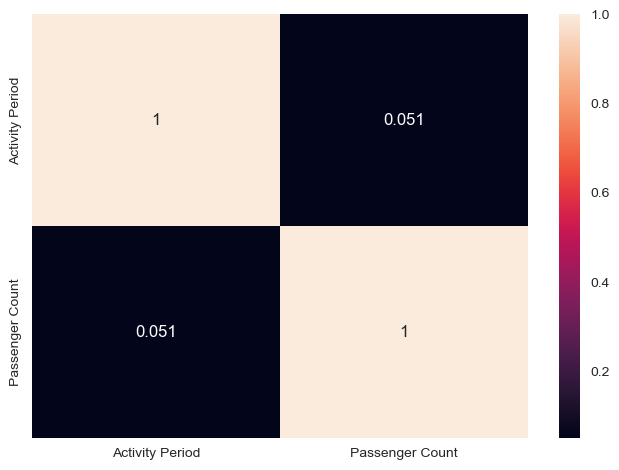

In [9]:
sns.heatmap(df.corr(),annot=True);

In [10]:
df.shape

(18885, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [12]:
df.drop(["Operating Airline IATA Code","Published Airline IATA Code"],axis=1,inplace=True)

In [13]:
df.isnull().sum()

Activity Period        0
Operating Airline      0
Published Airline      0
GEO Summary            0
GEO Region             0
Activity Type Code     0
Price Category Code    0
Terminal               0
Boarding Area          0
Passenger Count        0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Activity Period      18885 non-null  int64 
 1   Operating Airline    18885 non-null  object
 2   Published Airline    18885 non-null  object
 3   GEO Summary          18885 non-null  object
 4   GEO Region           18885 non-null  object
 5   Activity Type Code   18885 non-null  object
 6   Price Category Code  18885 non-null  object
 7   Terminal             18885 non-null  object
 8   Boarding Area        18885 non-null  object
 9   Passenger Count      18885 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [15]:
df["GEO Summary"].value_counts()

International    11904
Domestic          6981
Name: GEO Summary, dtype: int64

In [16]:
df["Price Category Code"].value_counts()

Other       16521
Low Fare     2364
Name: Price Category Code, dtype: int64

In [17]:
df["Passenger Count"].value_counts()

1         15
10        12
2         12
4         11
40         9
          ..
104094     1
3166       1
1337       1
972        1
11664      1
Name: Passenger Count, Length: 13970, dtype: int64

In [18]:
df.columns=(df.columns).str.replace(' ','')

In [19]:
x=df[["GEOSummary","PriceCategoryCode","PassengerCount",]]

In [20]:
x.head()

,GEOSummary,PriceCategoryCode,PassengerCount
0,Domestic,Low Fare,27271
1,Domestic,Low Fare,29131
2,Domestic,Low Fare,5415
3,International,Other,35156
4,International,Other,34090


In [26]:
x=pd.get_dummies(x,drop_first=True)

In [27]:
x.head()

,PassengerCount,GEOSummary_International,PriceCategoryCode_Other
0,27271,0,0
1,29131,0,0
2,5415,0,0
3,35156,1,1
4,34090,1,1


In [28]:
x.shape

(18885, 3)

In [29]:
model=KMeans(4)

In [30]:
model=model.fit(x)

In [31]:
tahmin=model.predict(x)

In [32]:
tahmin

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
silhouette_score(x,tahmin)

0.7861831969935342

In [34]:
x.shape

(18885, 3)

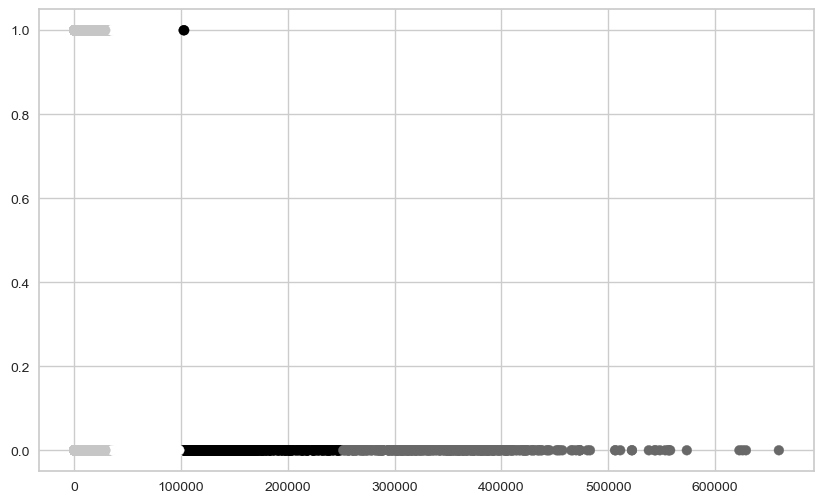

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(x.PassengerCount,x.GEOSummary_International,c=tahmin)

In [37]:
##KElbowVisualizer

In [38]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

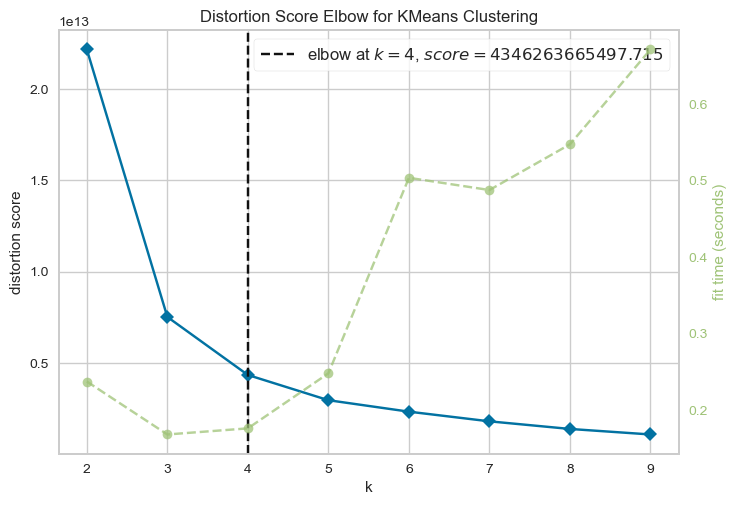

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
visualizer.fit(x)
visualizer.show()